In [23]:
import pandas as pd
import seaborn as sns

In [15]:
dat = pd.read_csv('~/Documents/PhD/Projects/10. ELECSIM/elecsim/data/raw/electricity_mix/electricity_mix.csv')
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,...,solar,ocgt,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,309,636,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,332,633,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,285,634,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,287,635,...,0.0,0,900,0.0,-414,0.0,0,0,0,0
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,297,637,...,0.0,0,900,0.0,-414,0.0,0,0,0,0


In [16]:
dat.columns = dat.columns.str.replace(" ", "")
dat.columns

Index(['id', 'timestamp', 'demand', 'frequency', 'coal', 'nuclear', 'ccgt',
       'wind', 'pumped', 'hydro', 'biomass', 'oil', 'solar', 'ocgt',
       'french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other',
       'north_south', 'scotland_england'],
      dtype='object')

In [17]:
dat.timestamp = pd.to_datetime(dat.timestamp)
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,pumped,hydro,...,solar,ocgt,french_ict,dutch_ict,irish_ict,ew_ict,nemo,other,north_south,scotland_england
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,309,636,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,332,633,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,285,634,...,0.0,0,912,0.0,-414,0.0,0,0,0,0
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,287,635,...,0.0,0,900,0.0,-414,0.0,0,0,0,0
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,297,637,...,0.0,0,900,0.0,-414,0.0,0,0,0,0


In [18]:
dat = dat.drop(columns=['pumped', 'french_ict', 'dutch_ict', 'irish_ict', 'ew_ict', 'nemo', 'other', 'north_south', 'scotland_england'])
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,636,0,0,0.0,0
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,633,0,0,0.0,0
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,634,0,0,0.0,0
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,635,0,0,0.0,0
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,637,0,0,0.0,0


In [20]:
dat['year'] = dat.timestamp.dt.year
dat.head()

,id,timestamp,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt,year
0,4,2011-05-27 15:50:04,38874,50.132000,9316,8221,18239,1253,636,0,0,0.0,0,2011
1,5,2011-05-27 15:55:02,38845,50.091000,9294,8225,18158,1304,633,0,0,0.0,0,2011
2,6,2011-05-27 16:00:02,38745,50.034000,9270,8224,18110,1322,634,0,0,0.0,0,2011
3,7,2011-05-27 16:05:01,38826,49.990002,9262,8220,18114,1364,635,0,0,0.0,0,2011
4,8,2011-05-27 16:10:02,38865,50.016998,9256,8210,18107,1370,637,0,0,0.0,0,2011


In [25]:
mean_dat = dat.groupby('year').mean()
mean_dat.head()

,id,demand,frequency,coal,nuclear,ccgt,wind,hydro,biomass,oil,solar,ocgt
year,,,,,,,,,,,,
2011,31348.500000,35117.011533,49.973152,11243.906907,6734.439815,14000.322492,1219.795135,466.658941,0.000000,1.184511,0.0,3.624214
2012,115321.270562,36554.332260,49.993865,15630.434915,7514.328127,9455.295672,1435.485117,372.808940,237.981436,2.305990,0.0,2.939490
2013,220313.500000,36247.977351,49.999951,14355.798134,7526.513864,9135.930888,2127.126709,332.950624,439.390879,0.866817,0.0,0.822531
2014,325101.000000,34421.810161,49.845724,11025.881341,6821.166719,9876.204078,2416.926159,447.842094,852.327038,0.577146,0.0,0.726249
2015,429962.000000,33028.107509,49.967928,8506.284996,7501.486303,9630.220892,2670.218641,467.429302,1288.407380,0.297364,0.0,0.740043


In [30]:
mean_long_dat = pd.melt(mean_dat.drop(columns=['id','demand','frequency']).reset_index(), id_vars='year')
mean_long_dat.head()

,year,variable,value
0,2011,coal,11243.906907
1,2012,coal,15630.434915
2,2013,coal,14355.798134
3,2014,coal,11025.881341
4,2015,coal,8506.284996


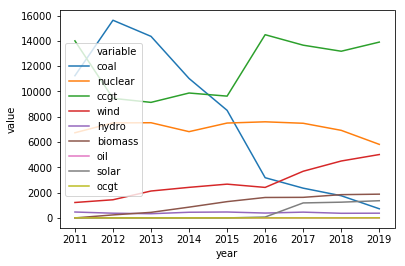

In [32]:
sns.lineplot(data=mean_long_dat, x='year', y='value', hue='variable')